In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

#DataURL = "https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv"
DataURL = "/content/drive/MyDrive/sample_data.csv"

popData = pd.read_csv(DataURL, dtype=({'year':int}))
popData['pop']=popData['pop']/1000000
popData

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8.425333,779.445314
1,Afghanistan,Asia,1957,30.332,9.240934,820.853030
2,Afghanistan,Asia,1962,31.997,10.267083,853.100710
3,Afghanistan,Asia,1967,34.020,11.537966,836.197138
4,Afghanistan,Asia,1972,36.088,13.079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9.216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10.704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11.404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11.926563,672.038623


<Axes: xlabel='year', ylabel='pop'>

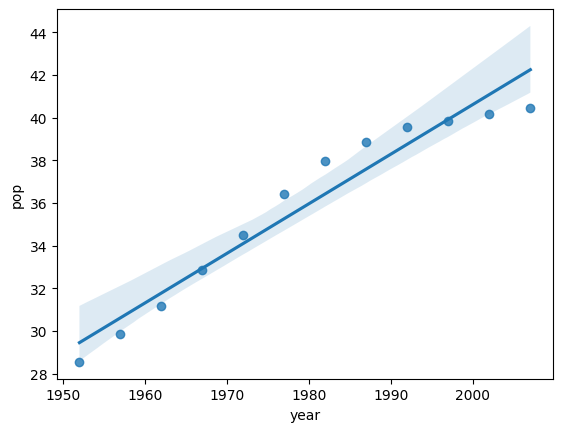

In [3]:
SpainData = popData[popData['country']=='Spain'] 
sns.regplot(x="year", y="pop", data=SpainData)

<Axes: xlabel='year', ylabel='pop'>

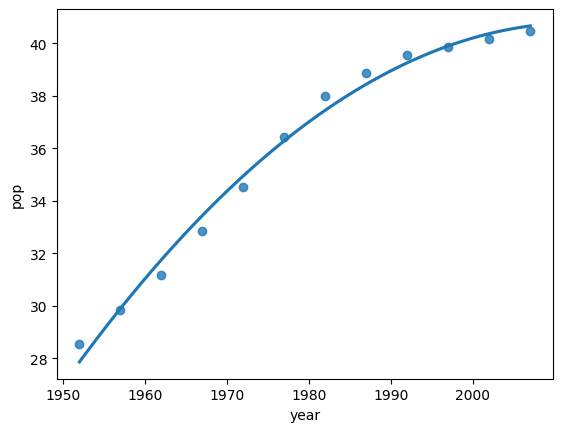

In [4]:
sns.regplot(x="year", y="pop", data=SpainData, order=2, ci=None)

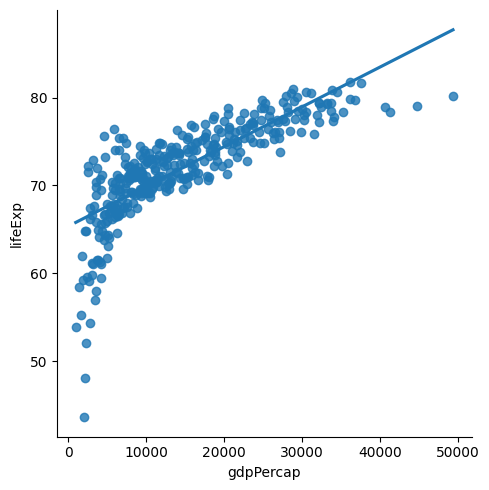

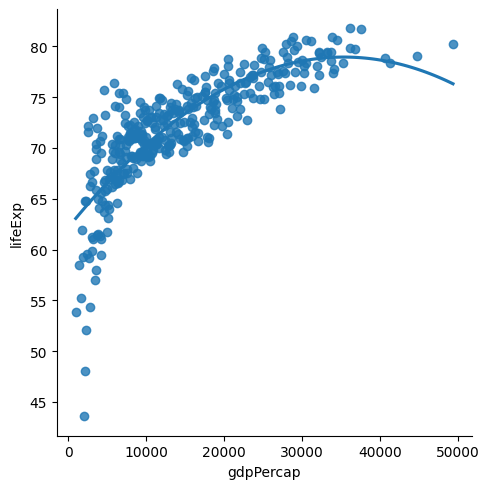

In [5]:
europeData = popData[popData['continent']=='Europe'] 

sns.lmplot(x="gdpPercap", y="lifeExp",data=europeData, ci=False, order=1)
sns.lmplot(x="gdpPercap", y="lifeExp",data=europeData, ci=False, order=2)

In [6]:
x = europeData['gdpPercap']
y = europeData['lifeExp']
from sklearn.linear_model import LinearRegression
new_model = LinearRegression().fit(np.array(x).reshape([-1,1]), np.array(y).reshape([-1,1]))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [65.342484]
slope: [[0.00045345]]


In [7]:
np.array(y).reshape([-1,1]).shape

(360, 1)

In [8]:
y_pred = new_model.predict(np.array(x).reshape([-1,1]))
print(f"predicted response:\n{y_pred[:10]}")

predicted response:
[[66.06848495]
 [66.22321527]
 [66.39126645]
 [66.59409882]
 [66.84495951]
 [66.94452913]
 [66.98891149]
 [67.03790781]
 [66.4749504 ]
 [66.79037868]]


In [9]:
print(f"predicted response:\n{y[:10]}")

predicted response:
12    55.230
13    59.280
14    64.820
15    66.220
16    67.690
17    68.930
18    70.420
19    72.000
20    71.581
21    72.950
Name: lifeExp, dtype: float64


In [10]:
y_pred = new_model.intercept_ + new_model.coef_ * np.array(x).reshape([-1,1])
print(f"predicted response:\n{y_pred[:10]}")

predicted response:
[[66.06848495]
 [66.22321527]
 [66.39126645]
 [66.59409882]
 [66.84495951]
 [66.94452913]
 [66.98891149]
 [67.03790781]
 [66.4749504 ]
 [66.79037868]]
